<h2 align="center">
Assignment #1
</h2>
<h5 align="center">
Eqan Ahmad | BSCS | 7B | ML | 19F0256
</h5>

### Task 1: Gradient Descent Algorithm with Linear Regression 


#### A. Applying Gradient Descent Algorithm

In [34]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from copy import deepcopy

Importing Data

In [1]:
df = pd.read_fwf('DataX.dat')
df.columns = ['Living area', 'Number of bedrooms', 'Number of floors']
X = df[['Living area', 'Number of bedrooms', 'Number of floors']]
df = pd.read_fwf('DataY.dat')
df.columns = ['House prices in response']
y = df['House prices in response']

NameError: name 'pd' is not defined

Comparing the shape of X & Y Variables

In [36]:
X.shape,y.shape

((50, 3), (50,))

Normalizing X and Y using Z-Score Method

In [37]:

X_Raw =  deepcopy(X)
y_Raw = deepcopy(y)
y = np.array((y-y.mean())/y.std())
X = X.apply(lambda rec: (rec-rec.mean())/rec.std(), axis=0)
X[0:10]

,Living area,Number of bedrooms,Number of floors
0,0.132400,-0.216671,-0.246050
1,-0.499389,-0.216671,-0.246050
2,0.503451,-0.216671,-0.246050
3,-0.730043,-1.570861,-1.783862
4,1.255581,1.137520,1.291762
5,-0.016773,1.137520,1.291762
6,-0.582124,-0.216671,-0.246050
7,-0.716254,-0.216671,-0.246050
8,-0.775170,-0.216671,-0.246050
9,-0.632266,-0.216671,-0.246050


Implementing Gradient Descent Algorithm


1.   Randomly initialize the bias and the weight theta
2.   Calculate predicted value of y that is Y given the bias and the weight
3.   Calculate the cost function from predicted and actual values of Y
4.   Calculate gradient and the weights



Random Initialization of bias and weights

In [38]:
def initialize(dim):
  b=random.random()
  theta=np.random.rand(dim)
  return b,theta

Predict Y Values from bias and Weights

In [39]:
def find_error(b,theta,X):
  return b + np.dot(X,theta)

Calculate the cost function- MSE

In [40]:
def get_cost(y,y_hat):
  y_resd=y-y_hat
  return np.sum(y_resd**2)/(len(y_resd)*2)

Update bias and weights

The parameters passed to the function are


1.   x,y : the input and output variable
2.   y_hat: predicted value with current bias and weights
3.   b_0,theta_0: current bias and weights
4.   Learning rate: learning rate to adjust the update step



In [41]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
  db = (np.sum(y_hat-y))/len(y)
  dw = (np.dot((y_hat-y), x))/len(y)
  b_1 = b_0-learning_rate*db
  theta_1 = theta_o-learning_rate*dw
  return b_1, theta_1

Finding the optimal Bias and Weights

In [42]:
def run_gradient_descent(X, y, alpha, num_iterations=100):
    b, theta = initialize(X.shape[1])
    iter_num = 0
    gd_iterations_df = pd.DataFrame(columns=['iteration', 'cost'])
    result_idx = 0
    new_cost = 10000000000000
    previous_cost = new_cost

    for each_iter in range(num_iterations):
        y_hat = find_error(b, theta, X)
        previous_cost = new_cost
        new_cost = get_cost(y, y_hat)
        prev_b = b
        prev_theta = theta
        b, theta = update_theta(X, y, y_hat, prev_b, prev_theta, alpha)

        if(iter_num % 10 == 0):
            gd_iterations_df.loc[result_idx] = [iter_num, new_cost]
            result_idx = result_idx+1
        iter_num += 1
    print("After Graident Descent Algo:\nFinal Estimate of b and theta : ", b, theta)

    return gd_iterations_df, b, theta, y_hat


In [43]:
gd_iterations_df,b,theta, y_hat=run_gradient_descent(X,y,alpha=0.02,num_iterations=200)

After Graident Descent Algo:
Final Estimate of b and theta :  0.011584376681311565 [ 0.80134766 -0.04601181  0.05699007]


In [44]:
gd_iterations_df[0:10]

,iteration,cost
0,0.0,1.499229
1,10.0,0.801497
2,20.0,0.495096
3,30.0,0.350947
4,40.0,0.276917
5,50.0,0.235102
6,60.0,0.209329
7,70.0,0.192315
8,80.0,0.180523
9,90.0,0.172083


Plotting the cost function against the iterations

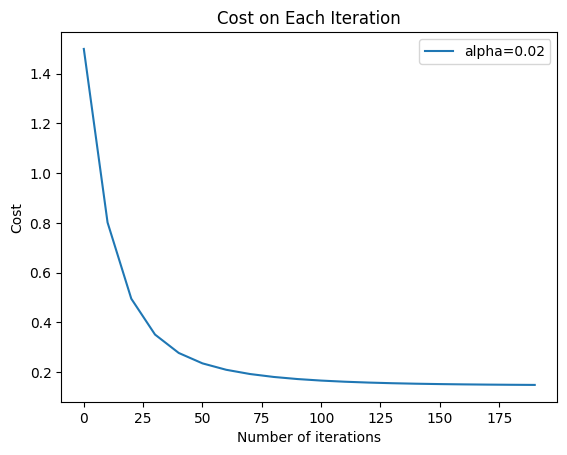

In [45]:
plt.plot(gd_iterations_df['iteration'],
         gd_iterations_df['cost'], label="alpha=0.02")
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Cost on Each Iteration')
plt.show()

Text(0.5, 1.0, 'Model mapped on DataSet')

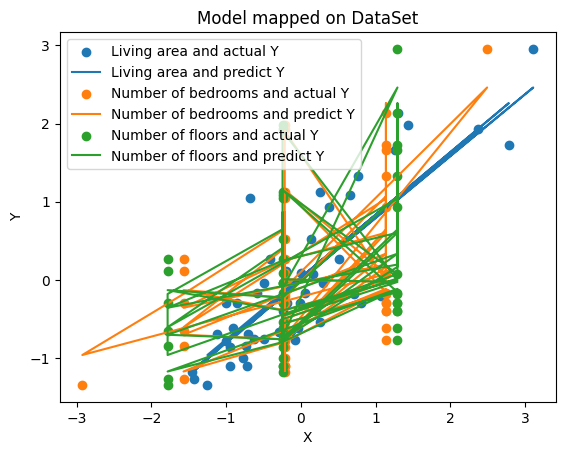

In [46]:
plt.scatter(X['Living area'], y, label="Living area and actual Y")
plt.plot(X['Living area'], y_hat, label="Living area and predict Y")
plt.scatter(X['Number of bedrooms'], y,
            label="Number of bedrooms and actual Y")
plt.plot(X['Number of bedrooms'], y_hat,
         label="Number of bedrooms and predict Y")
plt.scatter(X['Number of floors'], y, label="Number of floors and actual Y")
plt.plot(X['Number of floors'], y_hat, label="Number of floors and predict Y")
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Model mapped on DataSet')


 0.02 is the optimum value as it takes less iterations to converge. 0.002 takes around a 500 iterations to converge the cost value.

#### B. Applying Closed Form Solution

Implementing Closed Form Solution
1. Theta function
2. Prediction function
3. Plotting and comparing both results

Theta Function for closed form solution

In [47]:
# Applying Closed Form solution
ones = np.ones((X.shape[0], 1))
X_ = np.hstack((X, ones))

def predict_closedform(X, theta):
    return np.dot(X, theta)


Prediction function

In [48]:
def get_theta_closedform(X, y):
    firstPart = np.dot(X.T, X)
    secondPart = np.dot(X.T, y)
    firstPart = np.linalg.pinv(firstPart)
    theta = np.dot(firstPart, secondPart)
    return theta

Plotting & Comparing both results

In [49]:
theta = get_theta_closedform(X_, y)
theta


array([ 8.24766242e-01,  3.17303409e-01, -3.31898822e-01, -1.03628602e-16])

#### Conclusion

We have analyzed from the following results that cost decreases as the number of iterations have increased, and also how the model fits with our data.

#### Comaprison

In the following algorithm we have used the sum of least square method as a cost function
$$
  \frac{1}{2}*m\sum_{i=1}^n(h(x)^i-y^i)^2
$$
Then we took the derivative of this cost function to update the value of theta on each iteration, the equation is the following:
$$
  \frac{1}{m}\sum_{i=1}^n(h(x)^i-y^i)*x_n^i 
$$

After taking 100 iterations we compute the value of thetas and in the end we used the closed form solutiion to just multiply the matrix and formulate the result for the prediction of data and models accuracy.

In the closed form solution we used the least square equation to compute the final result:
$$
 B = (X^T*X)^-1 * X^Ty
$$
